In [21]:
import re
import numpy as np
import matplotlib.pyplot as plt
from evaluator import cache_hit_rate_evaluator
from utils import save_pickle

In [4]:
eval_config = {
    "filepath": "./dataset/wiki2018_valid.tr",
    "window_size": 50000,
    "capacity": 500000000,
    "access_history_len": 20,
    "scorer_type": "belady"
}

checkpoint_path_prefix = './result/checkpoints/model_'
checkpoints = [f"{checkpoint_path_prefix}{x}.ckpt" for x in range(30, 301, 30)]
map_checkpoint_to_chr = {}

for checkpoint in checkpoints:
    print(f"Checkpoint: {checkpoint}")
    evaluator = cache_hit_rate_evaluator(eval_config,
                                         None, checkpoint,
                                         max_examples=5000)
    step = 0
    map_checkpoint_to_chr[checkpoint] = []
    for hit_rates in evaluator:
        step += 1
        print(f"step {step}: {np.mean(hit_rates)}")
        map_checkpoint_to_chr[checkpoint].append(np.mean(hit_rates))
    print(f"Average: {np.mean(map_checkpoint_to_chr[checkpoint])}")

for checkpoint, hit_rates in map_checkpoint_to_chr.items():
    print(f"{checkpoint}: {hit_rates}")

Checkpoint: ./result/checkpoints/model_30.ckpt
Expects that all calls to loss are labeled with Belady's optimal policy.


Evaluating the model...: 5004it [02:24, 20.35it/s]

step 1: 0.11371902854355612


Evaluating the model...: 10002it [08:38, 10.20it/s]

step 2: 0.26640143850599163


Evaluating the model...: 15004it [17:53,  9.04it/s]

step 3: 0.2949959485040121


Evaluating the model...: 20006it [32:27,  9.75it/s] 

step 4: 0.18937166071047523


Evaluating the model...: 25006it [41:31,  8.76it/s]

step 5: 0.10931414575085803


Evaluating the model...: 30007it [1:33:16,  9.39it/s] 

step 6: 0.09961321457865781


Evaluating the model...: 35008it [2:41:44,  9.32it/s] 

step 7: 0.20805203265797043


Evaluating the model...: 40009it [2:50:38,  9.26it/s]

step 8: 0.1979589118051014


Evaluating the model...: 45011it [3:02:02,  9.77it/s]

step 9: 0.23484099695519098


Evaluating the model...: 50000it [3:09:28,  4.40it/s]


step 10: 0.1758523159116042
Checkpoint: ./result/checkpoints/model_60.ckpt
Expects that all calls to loss are labeled with Belady's optimal policy.


Evaluating the model...: 5005it [04:36, 20.61it/s]

step 1: 0.11371902854355612


Evaluating the model...: 10004it [23:16, 10.81it/s]

step 2: 0.26640143850599163


Evaluating the model...: 15004it [32:17,  9.30it/s]

step 3: 0.2931946679431155


Evaluating the model...: 20005it [41:19,  9.20it/s]

step 4: 0.17801453410582663


Evaluating the model...: 25006it [51:02,  7.44it/s]

step 5: 0.11130051106620095


Evaluating the model...: 30007it [1:00:11,  8.82it/s]

step 6: 0.11425200470116767


Evaluating the model...: 35008it [1:10:01,  8.89it/s]

step 7: 0.20822040584962848


Evaluating the model...: 40009it [1:19:19,  9.16it/s]

step 8: 0.19290556606934206


Evaluating the model...: 45010it [1:45:18,  9.95it/s] 

step 9: 0.21500295990921986


Evaluating the model...: 50000it [1:52:54,  7.38it/s]


step 10: 0.19520922654578454
Checkpoint: ./result/checkpoints/model_90.ckpt
Expects that all calls to loss are labeled with Belady's optimal policy.


Evaluating the model...: 5003it [02:10, 20.55it/s]

step 1: 0.11371902854355612


Evaluating the model...: 10003it [34:37, 10.09it/s]

step 2: 0.26640143850599163


Evaluating the model...: 15004it [43:52,  9.33it/s]

step 3: 0.29302832041924337


Evaluating the model...: 20005it [52:33,  9.21it/s]

step 4: 0.16084364081945507


Evaluating the model...: 25006it [1:02:02,  8.82it/s]

step 5: 0.13200762759166865


Evaluating the model...: 30007it [1:11:00,  9.27it/s]

step 6: 0.13391218101981428


Evaluating the model...: 35008it [1:20:12,  8.94it/s]

step 7: 0.2102450359714499


Evaluating the model...: 40009it [1:29:29,  8.99it/s]

step 8: 0.22246536715226004


Evaluating the model...: 45011it [1:38:16, 10.04it/s]

step 9: 0.2680209224686582


Evaluating the model...: 50000it [1:46:06,  7.85it/s]


step 10: 0.25822740679769796
Checkpoint: ./result/checkpoints/model_120.ckpt
Expects that all calls to loss are labeled with Belady's optimal policy.


Evaluating the model...: 5003it [02:18, 18.87it/s]

step 1: 0.11371902854355612


Evaluating the model...: 10002it [08:39, 10.37it/s]

step 2: 0.26640143850599163


Evaluating the model...: 15004it [17:55,  9.26it/s]

step 3: 0.29356104064987737


Evaluating the model...: 20005it [26:28,  9.34it/s]

step 4: 0.15995468867963936


Evaluating the model...: 25006it [35:56,  8.80it/s]

step 5: 0.13561690531712178


Evaluating the model...: 30007it [44:36,  9.27it/s]

step 6: 0.1328370592599616


Evaluating the model...: 35008it [53:51,  9.14it/s]

step 7: 0.23623351980617374


Evaluating the model...: 40009it [1:03:02,  9.14it/s]

step 8: 0.2376142070233149


Evaluating the model...: 45010it [1:12:11,  9.67it/s]

step 9: 0.2800209377252399


Evaluating the model...: 50000it [1:20:00, 10.42it/s]


step 10: 0.20600727788690068
Checkpoint: ./result/checkpoints/model_150.ckpt
Expects that all calls to loss are labeled with Belady's optimal policy.


Evaluating the model...: 5003it [02:15, 19.23it/s]

step 1: 0.11371902854355612


Evaluating the model...: 10002it [08:38, 10.01it/s]

step 2: 0.26640143850599163


Evaluating the model...: 15005it [17:50,  9.67it/s]

step 3: 0.2935184638954578


Evaluating the model...: 20005it [26:23,  8.50it/s]

step 4: 0.16958400578684665


Evaluating the model...: 25006it [42:34,  8.63it/s] 

step 5: 0.14028127644134558


Evaluating the model...: 30007it [51:41,  8.59it/s]

step 6: 0.14706872340509883


Evaluating the model...: 35008it [1:01:25,  8.11it/s]

step 7: 0.23208170457167765


Evaluating the model...: 40009it [1:10:56,  8.33it/s]

step 8: 0.2382514232152474


Evaluating the model...: 45010it [1:20:19,  9.36it/s]

step 9: 0.2956687274576918


Evaluating the model...: 50000it [1:28:02,  9.47it/s]


step 10: 0.2244382699302212
Checkpoint: ./result/checkpoints/model_180.ckpt
Expects that all calls to loss are labeled with Belady's optimal policy.


Evaluating the model...: 5002it [02:14, 20.29it/s]

step 1: 0.11371902854355612


Evaluating the model...: 10003it [08:35,  9.55it/s]

step 2: 0.26640143850599163


Evaluating the model...: 15005it [17:47,  9.62it/s]

step 3: 0.29351577542130475


Evaluating the model...: 20005it [26:20,  9.42it/s]

step 4: 0.16653051968661656


Evaluating the model...: 25006it [35:49,  8.72it/s]

step 5: 0.13636284258191655


Evaluating the model...: 30007it [44:41,  9.14it/s]

step 6: 0.14405523751052432


Evaluating the model...: 35008it [53:58,  9.06it/s]

step 7: 0.24029465929926905


Evaluating the model...: 40009it [1:03:19,  8.88it/s]

step 8: 0.24548640546678568


Evaluating the model...: 45010it [1:12:20,  9.12it/s]

step 9: 0.28012094458418674


Evaluating the model...: 50000it [1:20:13, 10.39it/s]


step 10: 0.24471860550628696
Checkpoint: ./result/checkpoints/model_210.ckpt
Expects that all calls to loss are labeled with Belady's optimal policy.


Evaluating the model...: 5003it [02:11, 20.54it/s]

step 1: 0.11371902854355612


Evaluating the model...: 10003it [08:20, 10.21it/s]

step 2: 0.26640143850599163


Evaluating the model...: 15004it [17:24,  8.85it/s]

step 3: 0.2942723379872194


Evaluating the model...: 20006it [25:45,  9.67it/s]

step 4: 0.15961953843219842


Evaluating the model...: 25006it [51:22,  8.06it/s] 

step 5: 0.13949758925397315


Evaluating the model...: 30007it [1:17:55,  8.81it/s] 

step 6: 0.14802223555860278


Evaluating the model...: 35008it [1:27:20,  8.90it/s]

step 7: 0.23667878489660465


Evaluating the model...: 40009it [1:36:32,  9.11it/s]

step 8: 0.24964387104051275


Evaluating the model...: 45011it [1:45:31, 10.12it/s]

step 9: 0.3086860179961965


Evaluating the model...: 50000it [1:53:03,  7.37it/s]


step 10: 0.23197922796994372
Checkpoint: ./result/checkpoints/model_240.ckpt
Expects that all calls to loss are labeled with Belady's optimal policy.


Evaluating the model...: 5003it [02:10, 20.36it/s]

step 1: 0.11371902854355612


Evaluating the model...: 10003it [08:06, 10.31it/s]

step 2: 0.26640143850599163


Evaluating the model...: 15005it [17:09,  9.86it/s]

step 3: 0.2947206959117763


Evaluating the model...: 20005it [41:23,  9.71it/s] 

step 4: 0.16140209358580002


Evaluating the model...: 25006it [50:28,  8.96it/s]

step 5: 0.14172841297197694


Evaluating the model...: 30007it [59:10,  8.21it/s]

step 6: 0.15627882074076668


Evaluating the model...: 35008it [1:08:48,  8.10it/s]

step 7: 0.23750444392160683


Evaluating the model...: 40009it [1:18:15,  8.90it/s]

step 8: 0.24442913628419544


Evaluating the model...: 45011it [1:27:40, 10.05it/s]

step 9: 0.30430263989909584


Evaluating the model...: 50000it [1:35:10,  8.76it/s]


step 10: 0.22751629233098516
Checkpoint: ./result/checkpoints/model_270.ckpt
Expects that all calls to loss are labeled with Belady's optimal policy.


Evaluating the model...: 5004it [02:11, 20.59it/s]

step 1: 0.11371902854355612


Evaluating the model...: 10003it [24:36, 10.32it/s]

step 2: 0.26640143850599163


Evaluating the model...: 15004it [33:38,  9.52it/s]

step 3: 0.29540704308218396


Evaluating the model...: 20006it [42:03,  9.68it/s]

step 4: 0.17483509080802215


Evaluating the model...: 25006it [51:14,  8.89it/s]

step 5: 0.1413844830580996


Evaluating the model...: 30007it [59:52,  9.15it/s]

step 6: 0.14426057371076903


Evaluating the model...: 35008it [1:08:58,  9.11it/s]

step 7: 0.24220365369861785


Evaluating the model...: 40009it [1:17:53,  9.08it/s]

step 8: 0.24832923429053919


Evaluating the model...: 45011it [1:43:32, 10.13it/s] 

step 9: 0.29596477748593625


Evaluating the model...: 50000it [1:51:06,  7.50it/s]


step 10: 0.23187167402302883
Checkpoint: ./result/checkpoints/model_300.ckpt
Expects that all calls to loss are labeled with Belady's optimal policy.


Evaluating the model...: 5003it [02:10, 20.52it/s]

step 1: 0.11371902854355612


Evaluating the model...: 10004it [08:11, 10.14it/s]

step 2: 0.26640143850599163


Evaluating the model...: 15004it [17:20,  9.12it/s]

step 3: 0.296743830400437


Evaluating the model...: 20005it [25:50,  9.54it/s]

step 4: 0.1916198522746334


Evaluating the model...: 25006it [35:08,  8.46it/s]

step 5: 0.14423798189565318


Evaluating the model...: 30007it [43:53,  8.91it/s]

step 6: 0.14768761549794482


Evaluating the model...: 35008it [1:08:23,  8.98it/s] 

step 7: 0.2301992021553281


Evaluating the model...: 40009it [1:17:32,  9.04it/s]

step 8: 0.24313123399525355


Evaluating the model...: 45011it [1:26:56,  9.91it/s]

step 9: 0.2947580877886351


Evaluating the model...: 50000it [1:34:33,  8.81it/s]


step 10: 0.23989266785577806
./result/checkpoints/model_30.ckpt: [0.11371902854355612, 0.26640143850599163, 0.2949959485040121, 0.18937166071047523, 0.10931414575085803, 0.09961321457865781, 0.20805203265797043, 0.1979589118051014, 0.23484099695519098, 0.1758523159116042]
./result/checkpoints/model_60.ckpt: [0.11371902854355612, 0.26640143850599163, 0.2931946679431155, 0.17801453410582663, 0.11130051106620095, 0.11425200470116767, 0.20822040584962848, 0.19290556606934206, 0.21500295990921986, 0.19520922654578454]
./result/checkpoints/model_90.ckpt: [0.11371902854355612, 0.26640143850599163, 0.29302832041924337, 0.16084364081945507, 0.13200762759166865, 0.13391218101981428, 0.2102450359714499, 0.22246536715226004, 0.2680209224686582, 0.25822740679769796]
./result/checkpoints/model_120.ckpt: [0.11371902854355612, 0.26640143850599163, 0.29356104064987737, 0.15995468867963936, 0.13561690531712178, 0.1328370592599616, 0.23623351980617374, 0.2376142070233149, 0.2800209377252399, 0.2060072778

In [4]:
for checkpoint, hit_rates in map_checkpoint_to_chr.items():
    print(f"{checkpoint}: {np.mean(hit_rates)}")

./result/checkpoints/model_30.ckpt: 0.1890119693923418
./result/checkpoints/model_60.ckpt: 0.18882203432398334
./result/checkpoints/model_90.ckpt: 0.20588709692897952
./result/checkpoints/model_120.ckpt: 0.2061966103397777
./result/checkpoints/model_150.ckpt: 0.21210130617531348
./result/checkpoints/model_180.ckpt: 0.21312054571064384
./result/checkpoints/model_210.ckpt: 0.2148520070184799
./result/checkpoints/model_240.ckpt: 0.21480030026957508
./result/checkpoints/model_270.ckpt: 0.21543769972067445
./result/checkpoints/model_300.ckpt: 0.2168390938913211


In [7]:
map_checkpoint_to_chr_file_path = "./result/cache_hit_rates_by_learned_policy_non_dagger.pkl"
save_pickle(map_checkpoint_to_chr_file_path, map_checkpoint_to_chr)

In [8]:
eval_config_lru = {
    "filepath": "./dataset/wiki2018_valid.tr",
    "window_size": 50000,
    "capacity": 500000000,
    "access_history_len": 20,
    "scorer_type": "lru"
}

evaluator = cache_hit_rate_evaluator(eval_config_lru,
                                     None, None,
                                     max_examples=5000)

hit_rates_lru = []
step = 0
for hit_rates in evaluator:
    step += 1
    print(f"step {step}: {np.mean(hit_rates)}")
    hit_rates_lru.append(np.mean(hit_rates))

# Print all hit rates
print(hit_rates_lru)
# Print average hit rate
print(f"Average hit rate: {np.mean(hit_rates_lru)}")

Evaluating the model...: 5201it [00:02, 1102.53it/s]

step 1: 0.11371902854355612


Evaluating the model...: 10087it [00:09, 517.44it/s]

step 2: 0.26640143850599163


Evaluating the model...: 15076it [00:21, 401.96it/s]

step 3: 0.29821851554986323


Evaluating the model...: 20048it [00:34, 383.29it/s]

step 4: 0.30872033588566716


Evaluating the model...: 25052it [00:48, 342.16it/s]

step 5: 0.30101864561233693


Evaluating the model...: 30042it [01:02, 338.53it/s]

step 6: 0.32701500365851066


Evaluating the model...: 35066it [01:16, 339.08it/s]

step 7: 0.3954180474529018


Evaluating the model...: 40056it [01:30, 348.14it/s]

step 8: 0.42432807656850513


Evaluating the model...: 45073it [01:44, 388.22it/s]

step 9: 0.4515188352965854


Evaluating the model...: 50000it [01:56, 428.88it/s]

step 10: 0.43164339497813514
[0.11371902854355612, 0.26640143850599163, 0.29821851554986323, 0.30872033588566716, 0.30101864561233693, 0.32701500365851066, 0.3954180474529018, 0.42432807656850513, 0.4515188352965854, 0.43164339497813514]
Average hit rate: 0.3318001322052053


In [9]:
hit_rates_lru_file_path = "./result/cache_hit_rates_by_lru_for_comparing_to_learned_policy_non_dagger.pkl"
save_pickle(hit_rates_lru_file_path, hit_rates_lru)

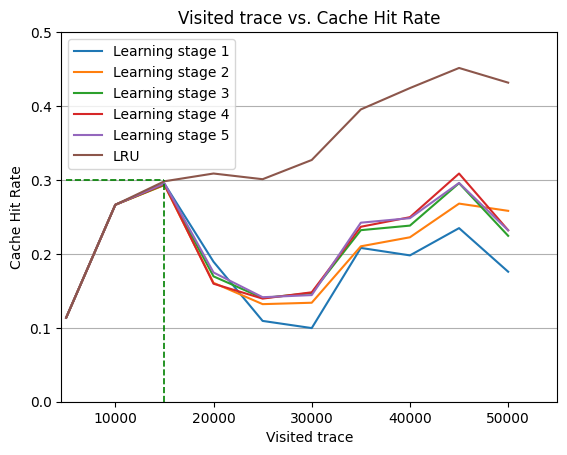

In [52]:
# Plot cache hit rates by lru and learned policy
trace_boundaries = [5000*i for i in range(1, 11)]
odds = {checkpoint: hit_rates for i, (checkpoint, hit_rates) in enumerate(map_checkpoint_to_chr.items()) if i % 2 == 0}
for i, (checkpoint, hit_rates) in enumerate(odds.items()):
    plt.plot(trace_boundaries, hit_rates, label=f"Learning stage {i+1}")

plt.axis([4500, 55000, 0, 0.5])
plt.xlabel('Visited trace')
plt.ylabel('Cache Hit Rate')
plt.title('Visited trace vs. Cache Hit Rate')
plt.plot(trace_boundaries, hit_rates_lru, label="LRU")
plt.plot([5000, 15000], [0.3, 0.3], 'g--', linewidth=1.2)
plt.plot([15000, 15000], [0, 0.3], 'g--', linewidth=1.2)
plt.legend(loc="best")
plt.grid(linestyle='-', axis='y')
plt.show()